#### Mempersiapkan Library

In [1]:
import pandas as pd
import numpy as np
import csv
import re
from string import punctuation
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

#### Mempersiapkan Dataset

In [2]:
tsv_file_path = "train_preprocess.tsv.txt"

data_text = []
label = []

with open(tsv_file_path, encoding='utf-8') as tsvfile:
    tsv_reader = csv.reader(tsvfile, delimiter='\t')
    for row in tsv_reader:
        data_text.append(row[0])
        label.append(row[1])

df = pd.DataFrame({'data_text': data_text, 'label': label})

In [3]:
df

,data_text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [4]:
df['len_data_text'] = df['data_text'].apply(lambda x: len(x.split()))

In [5]:
df

,data_text,label,len_data_text
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38
...,...,...,...
10995,tidak kecewa,positive,2
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,26
10997,hormati partai-partai yang telah berkoalisi,neutral,5
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,13


In [6]:
df.loc[df['len_data_text'] <= 3]

,data_text,label,len_data_text
9,bersyukur,positive,1
46,tidak memuaskan,negative,2
69,marah,negative,1
180,mengagumi,positive,1
181,tidak hebat,negative,2
...,...,...,...
10927,tidak indah,negative,2
10943,puas,positive,1
10972,tidak jahat,positive,2
10994,tidak bosan,positive,2


In [7]:
df = df.drop(df.index[df['len_data_text'] <= 10], axis=0)

In [8]:
df.loc[df['len_data_text'] <= 11]

,data_text,label,len_data_text
62,"jangan terlalu banyak iklan , perbaiki dulu ja...",negative,11
98,"hasil quick count pilgub kaltim 2018 , isran -...",neutral,11
118,cha-cha itu makanan ringan terenak dan tepat b...,positive,11
122,fadli zon anjing kau . tidak usah kau sok polos .,negative,11
345,"usung dedi mulyadii , golkar rayu pdip , demok...",neutral,11
...,...,...,...
10706,pagi ini lagi marah sama indosat karena kuota ...,negative,11
10789,tim sukses asik masih tunggu hasil resmi kpu j...,neutral,11
10821,tidak untung saya ikut romobongan untuk pergi ...,negative,11
10850,nyesel deh ganti mending yang kemarin deh indi...,negative,11


In [9]:
df

,data_text,label,len_data_text
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38
...,...,...,...
10989,tadinya pengin mengantar teman dari kalau ke r...,negative,49
10990,datang ke sini sore hari pakai baju agak tebal...,positive,23
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,26
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,13


In [10]:
train_data, test_data = train_test_split(df, test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.2)

In [11]:
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(5968, 3)
(1866, 3)
(1492, 3)


In [12]:
print('Komposisi Label train_data:')
print(train_data['label'].value_counts())

print('Komposisi Label test_data:')
print(test_data['label'].value_counts())

print('Komposisi Label val_data:')
print(val_data['label'].value_counts())

Komposisi Label train_data:
positive    3835
negative    1684
neutral      449
Name: label, dtype: int64
Komposisi Label test_data:
positive    1186
negative     541
neutral      139
Name: label, dtype: int64
Komposisi Label val_data:
positive    974
negative    398
neutral     120
Name: label, dtype: int64


#### Normalisasi Text

In [13]:
def lowercasing(paragraph):
    return paragraph.lower()

In [14]:
def menghilangkan_tandabaca(paragraph):
    new_paragraph = re.sub(fr'[{punctuation}]', r'', paragraph)
    return new_paragraph

In [15]:
def text_normalization(paragraph):
    paragraph = lowercasing(paragraph)
    paragraph = menghilangkan_tandabaca(paragraph)
    paragraph = re.sub(r"[ ]+",r' ',paragraph)
    return paragraph

In [16]:
train_data['data_text'] = train_data['data_text'].apply(lambda x: text_normalization(x))
test_data['data_text'] = test_data['data_text'].apply(lambda x: text_normalization(x))
val_data['data_text'] = val_data['data_text'].apply(lambda x: text_normalization(x))

#### Training Model

In [17]:
tokenizer = Tokenizer(oov_token='<UNK>')

In [18]:
tokenizer.fit_on_texts(train_data['data_text'])

In [19]:
train_data_tf = tokenizer.texts_to_sequences(train_data['data_text'])
test_data_tf = tokenizer.texts_to_sequences(test_data['data_text'])
val_data_tf = tokenizer.texts_to_sequences(val_data['data_text'])

In [20]:
train_data_tf

[[7, 334, 4760, 24, 1148, 91, 94, 2039, 8, 381, 4, 25, 6733, 722, 106],
 [239,
  16,
  20,
  159,
  460,
  929,
  481,
  4761,
  8,
  3811,
  7,
  162,
  286,
  10,
  1149,
  5,
  20,
  35,
  2448,
  2,
  4,
  175,
  3187,
  119,
  2449,
  119,
  2449,
  2,
  117,
  12,
  6734,
  673],
 [9, 11, 193, 5, 300, 32, 11, 313, 10, 96, 95, 82, 172, 871, 64, 325, 5, 359],
 [301,
  113,
  122,
  4762,
  148,
  15,
  5,
  3188,
  13,
  618,
  113,
  122,
  337,
  172,
  113,
  122,
  11,
  3,
  193,
  5,
  47,
  4762,
  9,
  2,
  41,
  211,
  50,
  25,
  134,
  17,
  760,
  1009,
  15,
  930,
  1009,
  522,
  271,
  33,
  34,
  13,
  375,
  3189,
  126,
  337,
  15,
  36,
  85,
  317,
  252,
  4763,
  4,
  122,
  250,
  37,
  134,
  23,
  2,
  25,
  26,
  68],
 [9, 2, 57, 674, 691, 691, 34, 10, 61, 2450, 538, 19, 2, 61, 26, 783, 3, 302],
 [9,
  3,
  325,
  704,
  259,
  23,
  3,
  217,
  135,
  120,
  14,
  11,
  160,
  84,
  59,
  121,
  6,
  13,
  14,
  123,
  13,
  19,
  7,
  73,
  63,
  71],


In [21]:
train_data['data_text']

1369     tidak perlu cemas karena bisnis anda akan berh...
1738     setiap ke sini pasti order green tea frappio d...
2583     tempat ini terletak di lembang restoran ini me...
9985     akhirnya mi bakso ramdhan masuk juga di tripad...
8753     tempat nya bagus nuansa kayu kayu rasa makanan...
                               ...                        
8357     maklumin saja kang ahy sudah kebelet nyapres m...
1372     kami sekeluarga kalau ke bandung pasti selalu ...
10014    gojek akan mulai membuka layanan mereka di beb...
3189     belum pernah makan makanan sunda yang bikin ke...
1018     the kiosk menurut saya adalah food court yang ...
Name: data_text, Length: 5968, dtype: object

In [22]:
train_data_tf[0]

[7, 334, 4760, 24, 1148, 91, 94, 2039, 8, 381, 4, 25, 6733, 722, 106]

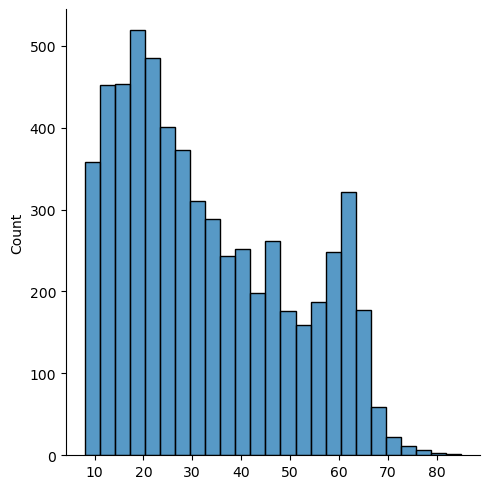

In [23]:
sns.displot([len(x) for x in train_data_tf])

In [24]:
train_padded = pad_sequences(sequences = train_data_tf, padding='post')

In [25]:
max_len = int(np.quantile([len(x) for x in train_data_tf], 0.9))

In [26]:
test_padded = pad_sequences(sequences = test_data_tf, padding='post', maxlen=max_len)
val_padded = pad_sequences(sequences = val_data_tf, padding='post', maxlen=max_len)

In [27]:
print(train_padded.shape)
print(test_padded.shape)
print(val_padded.shape)

(5968, 85)
(1866, 61)
(1492, 61)


In [28]:
onehot = OneHotEncoder()

In [29]:
onehot.fit_transform(train_data[['label']])

<5968x3 sparse matrix of type '<class 'numpy.float64'>'
	with 5968 stored elements in Compressed Sparse Row format>

In [30]:
train_labels = onehot.fit_transform(train_data[['label']]).toarray()

#### Model Testing and Evaluation

In [31]:
model = Sequential()

In [32]:
max_features = len(tokenizer.index_word)
batch_size=16
output_dim = 64
input_len = max_len

In [43]:
model = Sequential()
model.add(layers.Embedding(input_dim=len(tokenizer.index_word),
                           output_dim=output_dim, 
                           input_length=input_len))
model.add(layers.Conv1D(127, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [45]:
maximum_index_training = 1 #int(np.floor(train_padded.shape[0]/batch_size)*batch_size)
model.fit(x=train_padded[:maximum_index_training], 
          y=train_labels[:maximum_index_training],
          batch_size=batch_size, 
          epochs=20, 
          shuffle=False)

Epoch 1/20


ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 61), found shape=(None, 85)
